In [14]:
import pandas as pd

In [15]:
!ls ../../data


bank-full.csv  bank-names.txt bank.csv


In [16]:
bank_df = pd.read_csv('../../data/bank-full.csv', sep=';')
bank_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [17]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
bank_df.dtypes.sort_values()

age           int64
previous      int64
pdays         int64
campaign      int64
duration      int64
balance       int64
day           int64
month        object
contact      object
loan         object
housing      object
default      object
education    object
marital      object
job          object
poutcome     object
y            object
dtype: object

In [19]:
bank_df.shape

(45211, 17)

In [20]:
# select the first 8 columns of the datadframe, cos it contains the information about the
# clients features and the remaining columns contains the campaign geatures 
# bank_df.iloc[:, :8]
bank_df.iloc[:, 9:len(bank_df.columns)]

,day,month,duration,campaign,pdays,previous,poutcome,y
0,5,may,261,1,-1,0,unknown,no
1,5,may,151,1,-1,0,unknown,no
2,5,may,76,1,-1,0,unknown,no
3,5,may,92,1,-1,0,unknown,no
4,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...
45206,17,nov,977,3,-1,0,unknown,yes
45207,17,nov,456,2,-1,0,unknown,yes
45208,17,nov,1127,5,184,3,success,yes
45209,17,nov,508,4,-1,0,unknown,no


In [21]:
# check if any null values in the data frame
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
# For this dataset the average age of clients is 41years old with a std of 10 years. 
# The youngest client age is 18years old and oldest is 95 years.

# Also, the mean balance for each client is $1,362.27. However,75percent of clients 
# have $1,428 in their checkings. And an overdraft of $8,019

In [24]:
for col in bank_df.select_dtypes(include='object').columns:
    print(col)
    print(bank_df[col].sort_values().unique())

job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital
['divorced' 'married' 'single']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'telephone' 'unknown']
month
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome
['failure' 'other' 'success' 'unknown']
y
['no' 'yes']


To view how the data is distributed according to each column in regards to target variable (deposit)

In [25]:
client_info = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

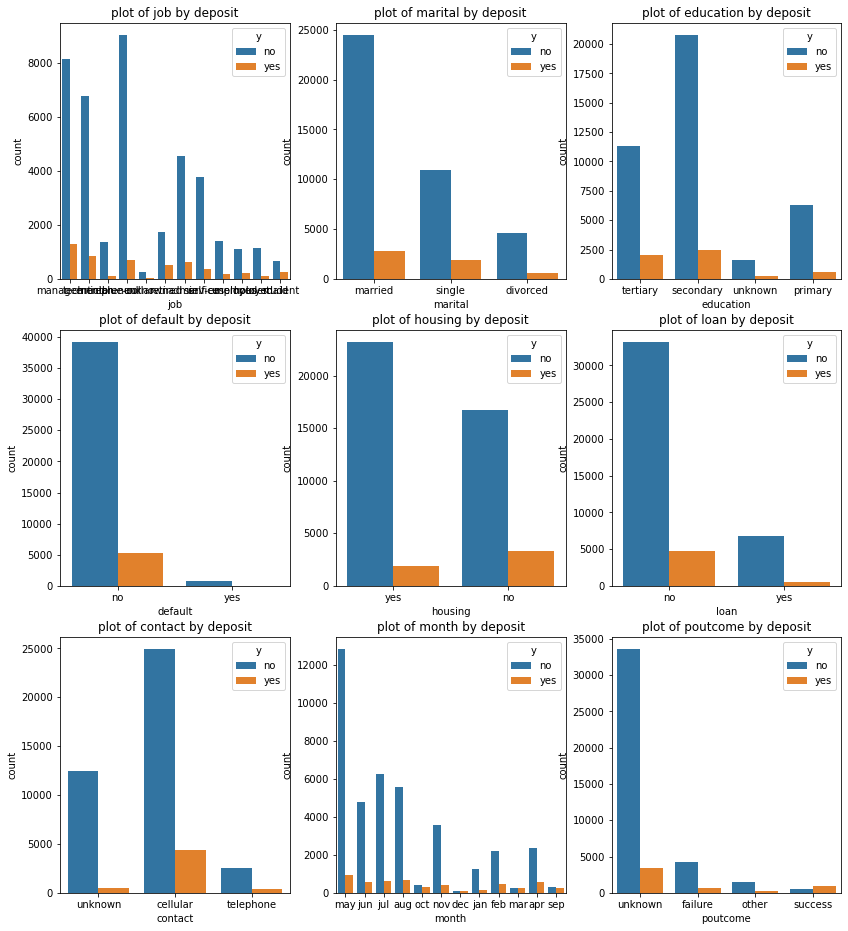

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
n = 1
plt.figure(figsize=[14,16])
for info in client_info:
    plt.subplot(3,3,n)
    sns.countplot(x=info, hue='y', data=bank_df)
    plt.title(f'plot of {info} by deposit')
    n+=1
plt.show()
#     n+= 1

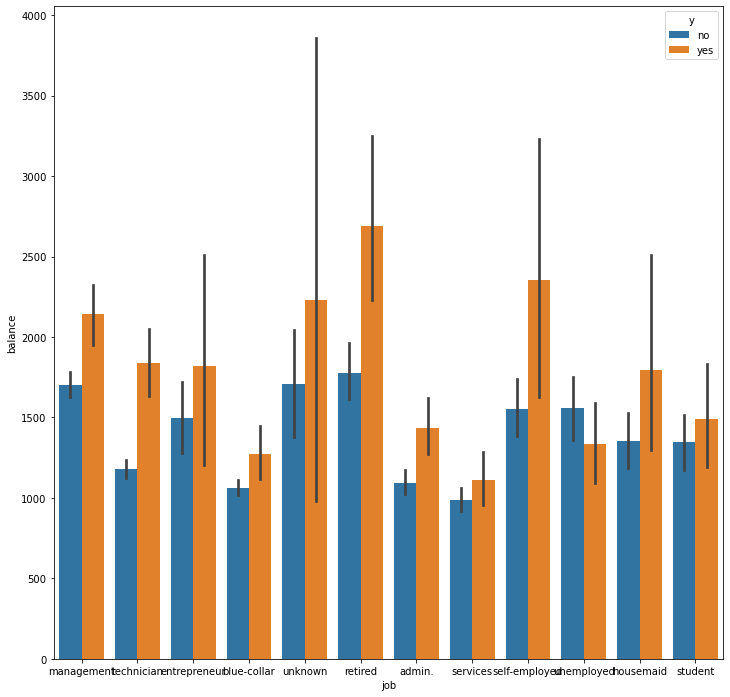

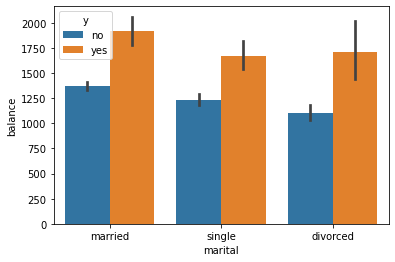

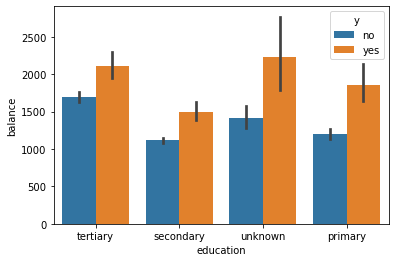

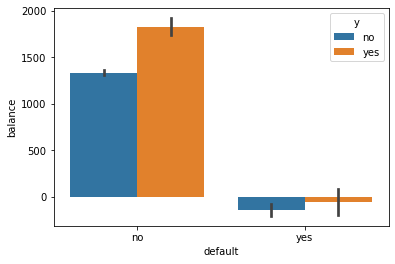

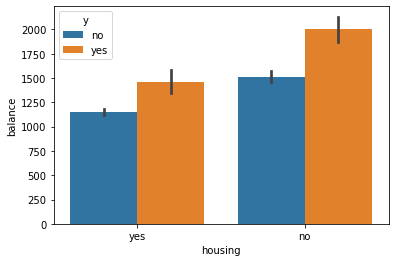

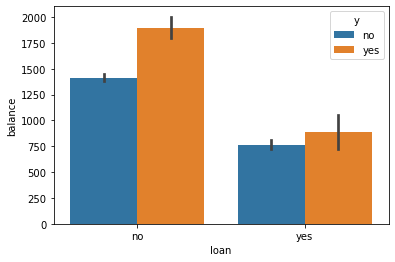

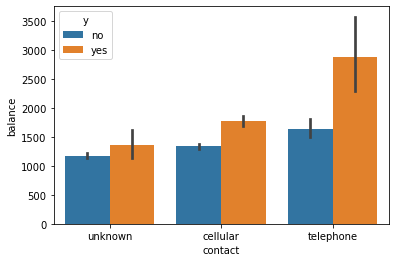

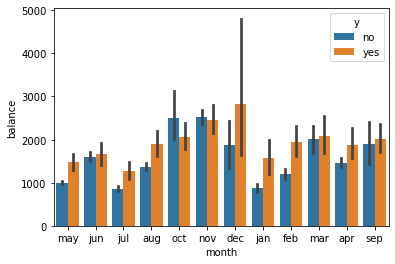

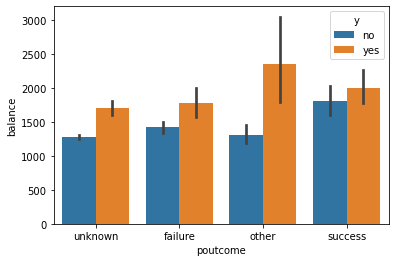

In [27]:
# comparing the amount in account with other features in respect to y=Deposit

plt.figure(figsize=[12,12])
for client in client_info:
    sns.barplot(x=client, y='balance', hue='y', data=bank_df)
    plt.show()

In [28]:
for info in client_info:
    print(bank_df.groupby(['y', info]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [29]:
bank_df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

### Feature Engineering 

In [30]:
bank_df_2 = bank_df.copy()

In [31]:
bank_df_2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [32]:
bank_df_2.groupby(['y', 'pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [33]:
bank_df_2.groupby(['y', 'previous']).size()

y    previous
no   0           33570
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Length: 66, dtype: int64

In [34]:
bank_df_2.groupby(['y', 'default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

The columns pdays, previous and default do not provide any neccessary meaningful infomation for the dataset. So we going to drop them

In [35]:
editted_bank_df = bank_df_2.drop(['default', 'pdays', 'previous'], axis=1)

In [36]:
editted_bank_df.groupby(['y', 'balance'])['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

Most of the people, not interested making deposit have negative balance. And with high balance are interested in making the deposit

In [37]:
editted_bank_df.groupby(['y', 'age'])['y'].count()

y    age
no   18      5
     19     24
     20     35
     21     57
     22     89
            ..
yes  87      3
     90      2
     92      2
     93      2
     95      1
Name: y, Length: 148, dtype: int64

In [38]:
editted_bank_df.groupby(['y', 'day'])['y'].count()

y    day
no   1       232
     2      1111
     3       901
     4      1215
     5      1695
            ... 
yes  27      150
     28      143
     29      129
     30      271
     31       46
Name: y, Length: 62, dtype: int64

In [39]:
editted_bank_df.groupby(['y', 'housing'])['y'].count()

y    housing
no   no         16727
     yes        23195
yes  no          3354
     yes         1935
Name: y, dtype: int64

In [40]:
editted_bank_df.groupby(['y', 'job'])['y'].count()

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
Name: y, dtype: int64

In [47]:
editted_bank_df.to_csv('eddited_bank.csv', sep=';', index_label=False)

In [49]:
editted_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,unknown,no


In [ ]:
cat_varia